In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
seq = get_standardized_measures('results/sequential_10.csv')
seq_time_tot = seq['TOTAL'].mean()

In [3]:
data = get_standardized_measures('results/thr_10.csv', excluded_columns=['P_DEGREE'])

In [4]:
data

,P_DEGREE,READING,HUFFBUILD,ENCODING,TOTAL
0,1,1184672323,73132,1180509936,2365255391
1,1,1170740512,68347,1189417470,2360226329
2,1,1171514278,68585,1176943280,2348526143
3,1,1171969113,68604,1190726232,2362763949
4,1,1188592043,68823,1180856361,2369517227
...,...,...,...,...,...
95,20,86816048,63998,1175652453,1262532499
96,20,88734881,64717,1195504805,1284304403
97,20,117339112,67074,1200895668,1318301854
98,20,87487905,64278,1178005433,1265557616


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

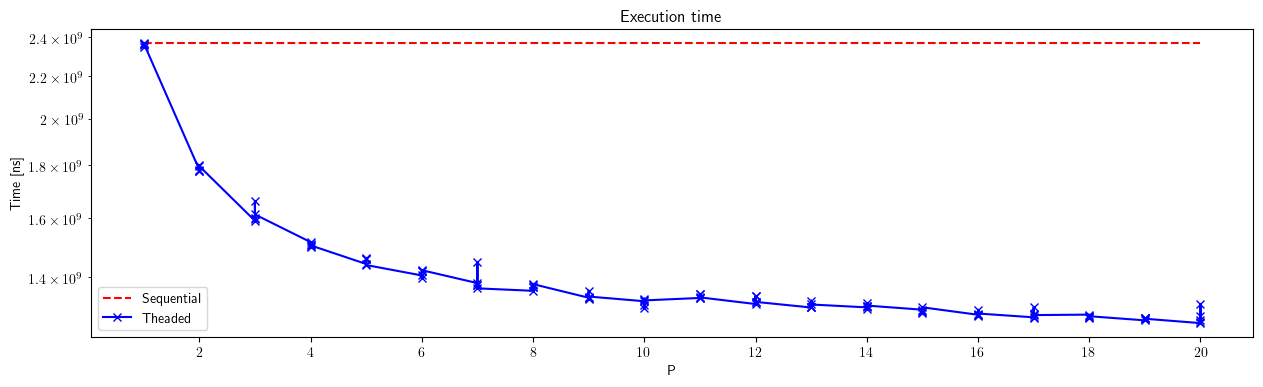

In [6]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(data['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
plt.yscale('log')
# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [7]:
import pandas as pd

In [8]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).mean()

In [9]:
sp_data

,P_DEGREE,READING,HUFFBUILD,ENCODING,TOTAL
0,1,1.177498e+09,69498.2,1.183691e+09,2.361258e+09
1,2,5.998584e+08,71481.6,1.187440e+09,1.787370e+09
2,3,4.115011e+08,69863.6,1.200112e+09,1.611683e+09
3,4,3.139070e+08,74294.0,1.191339e+09,1.505321e+09
4,5,2.521500e+08,70586.2,1.199362e+09,1.451583e+09
5,6,2.109709e+08,70326.6,1.201384e+09,1.412425e+09
6,7,1.819983e+08,71730.2,1.207025e+09,1.389095e+09
7,8,1.587561e+08,77368.2,1.211016e+09,1.369850e+09
8,9,1.437413e+08,68595.6,1.196976e+09,1.340786e+09
9,10,1.275618e+08,64130.4,1.194593e+09,1.322218e+09


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [10]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [11]:
sp_data

,P_DEGREE,READING,HUFFBUILD,ENCODING,TOTAL,S_p
0,1,1.177498e+09,69498.2,1.183691e+09,2.361258e+09,1.002895
1,2,5.998584e+08,71481.6,1.187440e+09,1.787370e+09,1.324904
2,3,4.115011e+08,69863.6,1.200112e+09,1.611683e+09,1.469329
3,4,3.139070e+08,74294.0,1.191339e+09,1.505321e+09,1.573149
4,5,2.521500e+08,70586.2,1.199362e+09,1.451583e+09,1.631387
5,6,2.109709e+08,70326.6,1.201384e+09,1.412425e+09,1.676614
6,7,1.819983e+08,71730.2,1.207025e+09,1.389095e+09,1.704774
7,8,1.587561e+08,77368.2,1.211016e+09,1.369850e+09,1.728725
8,9,1.437413e+08,68595.6,1.196976e+09,1.340786e+09,1.766197
9,10,1.275618e+08,64130.4,1.194593e+09,1.322218e+09,1.791000


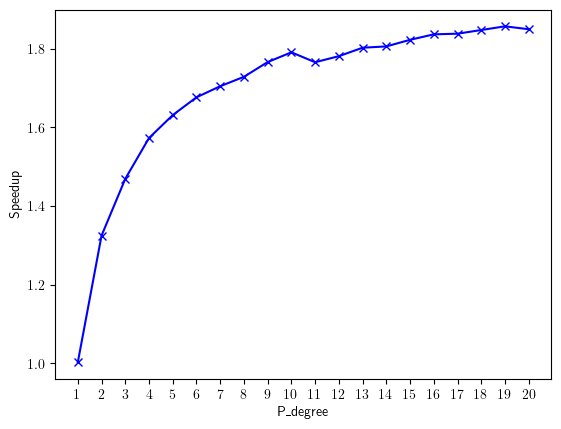

In [12]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Speedup')

plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], 'x-b')

# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [13]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    2.361258e+09
Name: TOTAL, dtype: float64

In [14]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


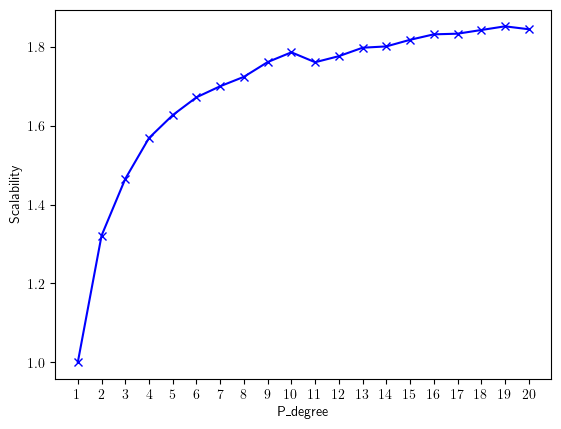

In [15]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')